1.1

In [10]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import spicy
import math 

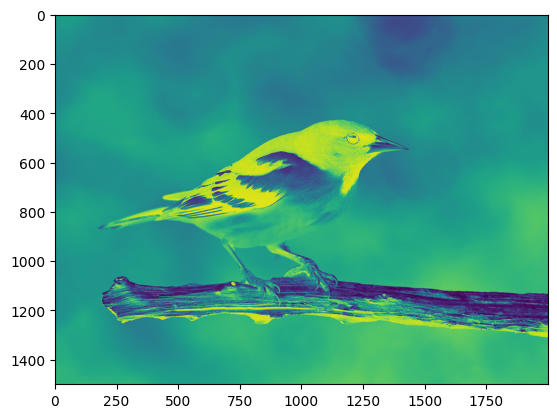

In [8]:
img = Image.open("exercise/bird.png").convert("L")
im_1 = np.asarray(img)
im_2 = 255 - im_1
new_img = Image.fromarray(im_2)
img.show()
plt.imshow(new_img)
plt.show()

1.2

In [12]:
img = Image.open("exercise/bird.png").convert("L")

im_1 = np.asarray(img)

gamma = 0.5

b1 = im_1.astype(float) 

b2 = np.max(b1)

b3 = b1/b2

b2 = np.log(b3) * gamma

c = np.exp(b2) * 255

c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

/var/folders/n6/ksm07q_92v7g4yx9zxrgjlx80000gn/T/ipykernel_53043/3145410354.py:13: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


TypeError: Cannot handle this data type: (1, 1), <i8

1.3

In [ ]:
img = Image.open("exercise/bird.png").convert("L")
im_1 = np.asarray(img)
b1 = im_1.astype(float)
b2 = np.max(b1)
c = (128.0 * np.log(b1 + 1)) / np.log(1+b2) 

c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()

TypeError: Cannot handle this data type: (1, 1), <i8

1.4

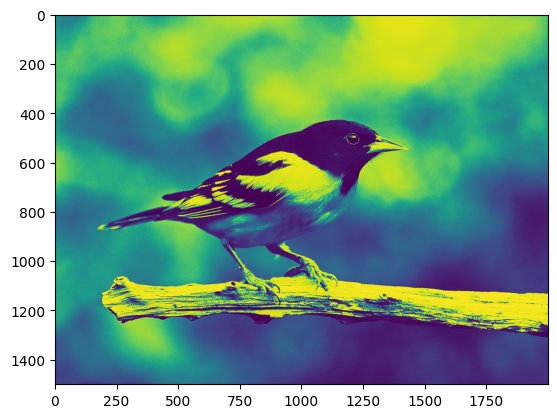

In [ ]:
img = Image.open("exercise/bird.png").convert("L")
im1 = np.asarray(img)
b1 = im1.flatten()
hist, bins = np.histogram(im1, bins=256, range=(0, 255))
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf, 0).astype('uint8')
im2 = cdf[b1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4)
plt.show()

1.5

Max: 0 Min: 255


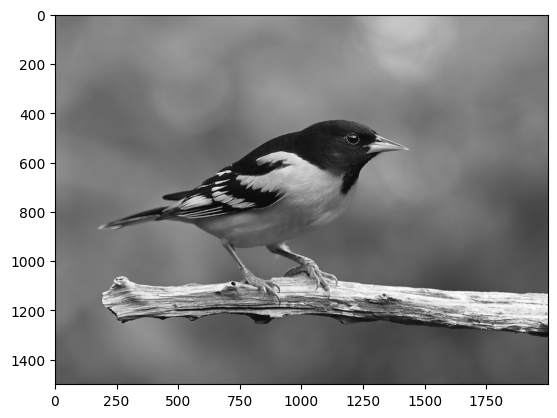

In [ ]:
img = Image.open("exercise/bird.png").convert("L")
im1 = np.asarray(img)
b = im1.max()
a = im1.min()
print("Max:", a, "Min:", b)
c = im1.astype(float)
im2 = 255* (c - a) / (b - a)
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.1

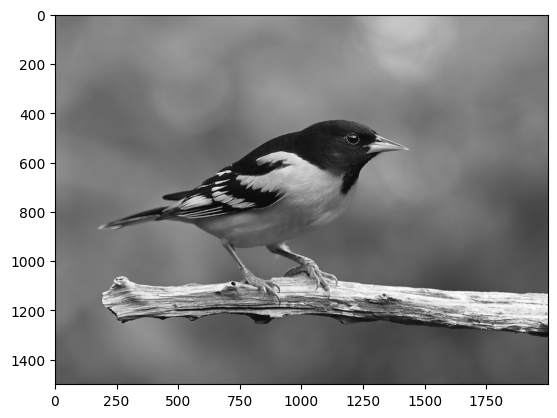

In [ ]:
img = Image.open("exercise/bird.png").convert("L")
im1 = np.asarray(img)
c = abs(spicy.fftpack.fft2(im1))
d = spicy.fftpack.fftshift(c)
d = d.astype(float)

img = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

1.6.2

Butterworth Lowpass Filter

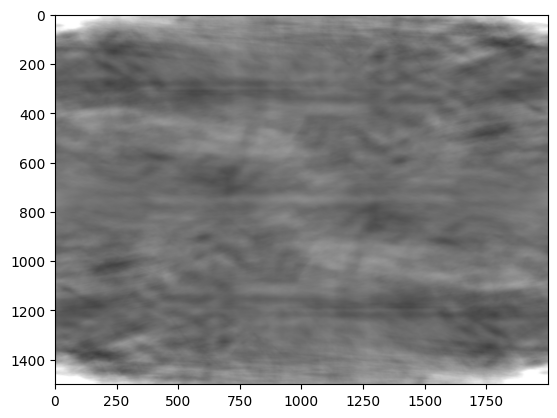

In [ ]:
img = Image.open("exercise/bird.png").convert("L")
im1 = np.asarray(img)
c = abs(spicy.fftpack.fft2(im1))
d = spicy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 1
t2 = 2*t1

for i in range(1,M):
    for j in range(1,N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        
        if r>d_0:
            H[i,j] = 1/(1+ (r/d_0)**t1)
            
H = H.astype(float)
H = Image.fromarray(H)
con = d*H
e = abs(spicy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

Butterworth highpass Filter

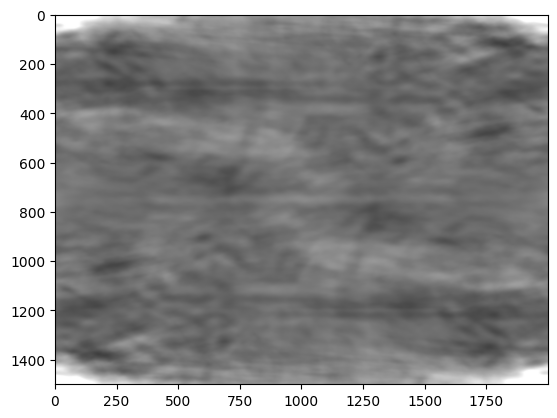

In [ ]:
img = Image.open("exercise/bird.png").convert("L")
im1 = np.asarray(img)
c = abs(spicy.fftpack.fft2(im1))
d = spicy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 1
t2 = 2*t1

for i in range(1,M):
    for j in range(1,N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        
        if r>d_0:
            H[i,j] = 1/(1+ (r/d_0)**t2)
            
H = H.astype(float)
H = Image.fromarray(H)
con = d*H
e = abs(spicy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

Bài 1

Image inverse transformation - I
Gamma correction - G
Log transformation - L
Histogram equalization - H
Contrast stretching - C
Thoát - E
Histogram Equalization


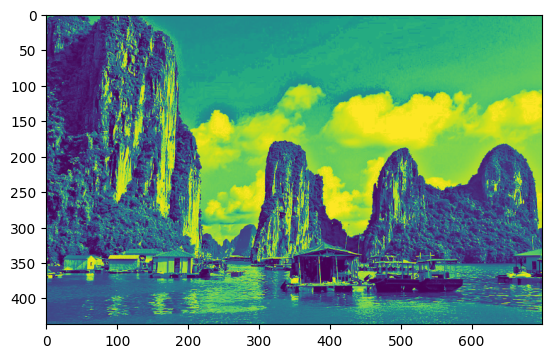

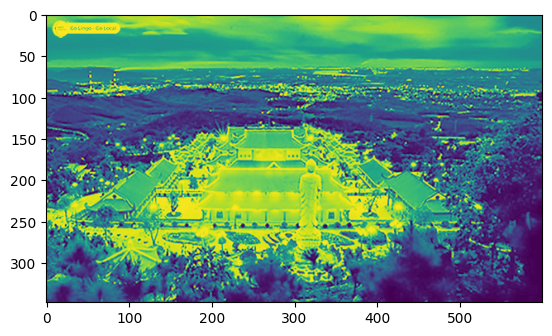

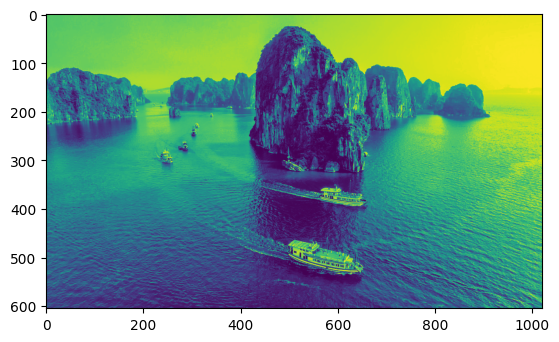

In [30]:
list_images = ["exercise/ha-long-bay-in-vietnam.jpg","exercise/pagoda.jpg","exercise/quang_ninh.jpg",]

def Bt1(list):
    input_choice = input("Nhập chương trình muốn thực hiện: ").strip().lower()
    if input_choice == "i":
        count = 0
        print("Inverse Image Transformation")
        for i in list:
            count += 1
            img = Image.open(i).convert("L")
            im_1 = np.asarray(img)
            im_2 = 255 - im_1
            new_img = Image.fromarray(im_2)
            plt.imshow(new_img)
            plt.show()
            iio.imsave("Image_inverse_transformed_" + str(count) + ".jpg", new_img)
    elif input_choice == "g":
        count = 0
        print("Gamma Correction")
        for i in list:
            count +=1
            img = Image.open(i).convert("L")
            im_1 = np.asarray(img)
            gamma = 0.5
            b1 = im_1.astype(float) 
            b2 = np.max(b1)
            b3 = b1/b2
            b2 = np.log(b3) *gamma
            c = np.exp(b2) * 255
            c1 = c.astype(int)
            d = Image.fromarray(c1)
            plt.imshow(d)
            plt.show()
            iio.imsave("gamma_corrected_" + str(count) + ".png", d)
    elif input_choice == "l":
        count = 0
        print("Log Transformation")
        for i in list:
            count +=1
            img = Image.open(i).convert("L")
            im_1 = np.asarray(img)
            b1 = im_1.astype(float)
            b2 = np.max(b1)
            c = (128.0 * np.log(b1 + 1)) / np.log(1+b2) 
            c1 = c.astype(int)
            d = Image.fromarray(c1)
            plt.imshow(d, cmap='gray')
            plt.show()
            iio.imsave("log_transformed_" + str(count) + ".png", d)
    elif input_choice == "h":
        count = 0
        print("Histogram Equalization")
        for i in list:
            count +=1
            img = Image.open(i).convert("L")
            im1 = np.asarray(img)
            b1 = im1.flatten()
            hist, bins = np.histogram(im1, bins=256, range=(0, 255))
            cdf = hist.cumsum()
            cdf_m = np.ma.masked_equal(cdf, 0)
            num_cdf_m = (cdf_m - cdf_m.min())*255
            den_cdf_m = (cdf.max() - cdf_m.min())
            cdf = num_cdf_m / den_cdf_m
            cdf = np.ma.filled(cdf, 0).astype('uint8')
            im2 = cdf[b1]
            im3 = np.reshape(im2, im1.shape)
            im4 = Image.fromarray(im3)
            plt.imshow(im4)
            plt.show()
            iio.imsave("histogram_equalized_" + str(count) + ".png", im4)
    elif input_choice == "c":
        count = 0
        print("Contrast Stretching")
        for i in list:
            count +=1
            img = Image.open(i).convert("L")
            im1 = np.asarray(img)
            b = im1.max()
            a = im1.min()
            print("Max:", a, "Min:", b)
            c = im1.astype(float)
            im2 = 255* (c - a) / (b - a)
            im2 = im2.astype(np.uint8)
            im3 = Image.fromarray(im2)
            plt.imshow(im3)
            plt.show()
            iio.imsave("contrast_stretched_" + str(count) + ".png", im3)
    elif input_choice == "e":
        print("Thoát chương trình")
    else:
        print("Lựa chọn không hợp lệ, vui lòng thử lại.")
        
print("Image inverse transformation - I")
print("Gamma correction - G")
print("Log transformation - L")
print("Histogram equalization - H")
print("Contrast stretching - C")
print("Thoát - E")

Bt1(list_images)

Bài 2

-----Chương trình xử lý ảnh 2.1-----
Fast Fourier - F
Butterworth Lowpass Filter - L
Butterworth Highpass Filter - H
Thoát - E
Fast Fourier


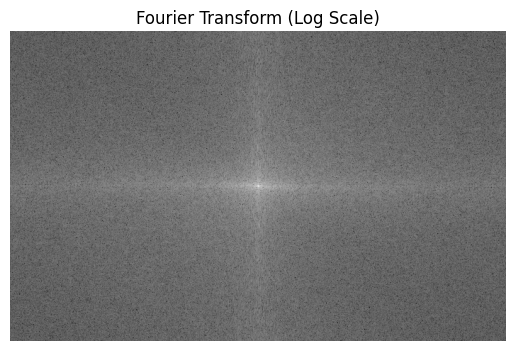

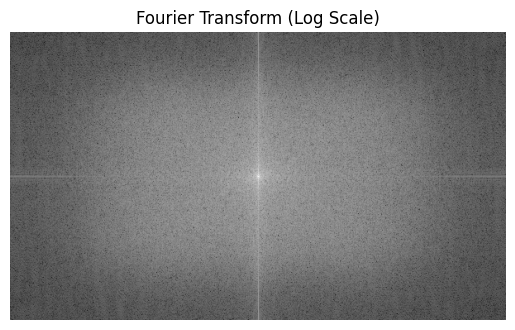

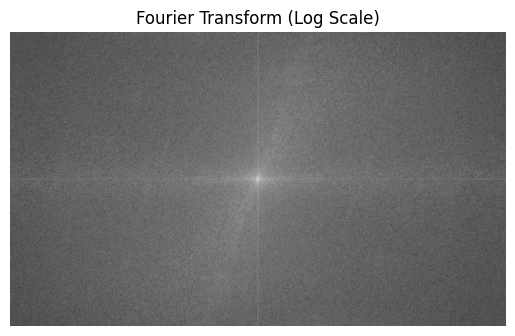

In [ ]:
import numpy as np
import scipy.fftpack
from PIL import Image
import matplotlib.pyplot as plt
import imageio.v3 as iio
import math

def BLF(list):
    count = 0
    print("Butterworth Lowpass Filter")
    for file in list:
        count += 1
        img = Image.open(file).convert("L")
        im1 = np.asarray(img)
        F = scipy.fftpack.fft2(im1)
        F_shifted = scipy.fftpack.fftshift(F)
        M, N = im1.shape
        H = np.zeros((M, N))

        center1 = M / 2
        center2 = N / 2
        d_0 = 30.0
        t1 = 1

        for u in range(M):
            for v in range(N):
                D = math.sqrt((u - center1)**2 + (v - center2)**2)
                H[u, v] = 1 / (1 + (D / d_0)**(2 * t1))

        G = F_shifted * H
        G = scipy.fftpack.ifftshift(G)
        img_back = abs(scipy.fftpack.ifft2(G))
        img_back = np.clip(img_back, 0, 255).astype(np.uint8)

        im3 = Image.fromarray(img_back)
        plt.imshow(im3, cmap='gray')
        plt.title("Butterworth Lowpass")
        plt.axis('off')
        plt.show()
        iio.imwrite(f"BLF{count}.jpg", im3)

def BHF(list):
    count = 0
    print("Butterworth Highpass Filter")
    for file in list:
        count += 1
        img = Image.open(file).convert("L")
        im1 = np.asarray(img)
        F = scipy.fftpack.fft2(im1)
        F_shifted = scipy.fftpack.fftshift(F)
        M, N = im1.shape
        H = np.zeros((M, N))

        center1 = M / 2
        center2 = N / 2
        d_0 = 30.0
        t2 = 2

        for u in range(M):
            for v in range(N):
                D = math.sqrt((u - center1)**2 + (v - center2)**2)
                if D == 0:
                    H[u, v] = 0
                else:
                    H[u, v] = 1 / (1 + (d_0 / D)**(2 * t2))

        G = F_shifted * H
        G = scipy.fftpack.ifftshift(G)
        img_back = abs(scipy.fftpack.ifft2(G))
        img_back = np.clip(img_back, 0, 255).astype(np.uint8)

        im3 = Image.fromarray(img_back)
        plt.imshow(im3, cmap='gray')
        plt.title("Butterworth Highpass")
        plt.axis('off')
        plt.show()
        iio.imwrite(f"BHF{count}.jpg", im3)

def FF(list):
    count = 0
    print("Fast Fourier")
    for file in list:
        count += 1
        img = Image.open(file).convert("L")
        im1 = np.asarray(img)
        F = scipy.fftpack.fft2(im1)
        F_shifted = scipy.fftpack.fftshift(abs(F))
        F_log = np.log(1 + F_shifted)
        F_norm = (F_log / np.max(F_log) * 255).astype(np.uint8)

        img_fft = Image.fromarray(F_norm)
        plt.imshow(img_fft, cmap='gray')
        plt.title("Fourier Transform (Log Scale)")
        plt.axis('off')
        plt.show()
        iio.imwrite(f"FF{count}.jpg", img_fft)

if __name__ == "__main__":
    print("-----Chương trình xử lý ảnh 2.1-----")
    print("Fast Fourier - F")
    print("Butterworth Lowpass Filter - L")
    print("Butterworth Highpass Filter - H")
    print("Thoát - E")

    list_of_images = ["exercise/ha-long-bay-in-vietnam.jpg","exercise/pagoda.jpg","exercise/quang_ninh.jpg",]

    input_choice = input("Nhập chương trình muốn thực hiện: ").strip().lower()

    if input_choice == "f":
        FF(list_of_images)
    elif input_choice == "l":
        BLF(list_of_images)
    elif input_choice == "h":
        BHF(list_of_images)
    elif input_choice == "e":
        print("Thoát chương trình")
    else:
        print("Lựa chọn không hợp lệ, vui lòng thử lại.")


Bài 3

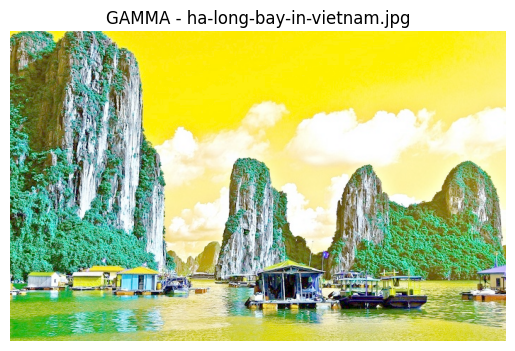

Đã lưu ảnh: gamma_1.png


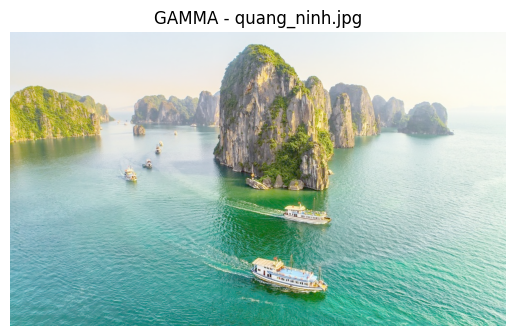

Đã lưu ảnh: gamma_2.png


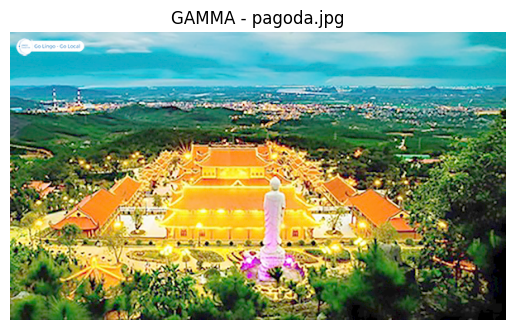

Đã lưu ảnh: gamma_3.png


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imageio.v3 as iio
import os
import random

def get_random_rgb_permutation(img_array):
    perm = np.random.permutation(3)
    return img_array[:, :, perm]

def inverse(img_array):
    return 255 - img_array

def gamma_correction(img_array, gamma=0.5):
    norm = img_array.astype(float) / 255.0
    corrected = np.power(norm, gamma) * 255
    return np.clip(corrected, 0, 255).astype(np.uint8)

def log_transform(img_array):
    b = np.max(img_array)
    result = (128.0 * np.log(img_array + 1)) / np.log(1 + b)
    return np.clip(result, 0, 255).astype(np.uint8)

def histogram_equalization(img_array):
    flat = img_array.flatten()
    hist, _ = np.histogram(flat, bins=256, range=(0, 255))
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_scaled = ((cdf_m - cdf_m.min()) * 255) / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_scaled, 0).astype(np.uint8)
    equalized = cdf[flat]
    return np.reshape(equalized, img_array.shape)

def contrast_stretching(img_array):
    a, b = img_array.min(), img_array.max()
    stretched = 255 * (img_array - a) / (b - a)
    return np.clip(stretched, 0, 255).astype(np.uint8)

transform_functions = [
    ("inverse", inverse),
    ("gamma", gamma_correction),
    ("log", log_transform),
    ("hist_eq", histogram_equalization),
    ("contrast", contrast_stretching)
]

def process_images_rgb(image_paths):
    count = 0
    for path in image_paths:
        count += 1
        img = Image.open(path).convert("RGB")
        img_arr = np.asarray(img)

        
        permuted = get_random_rgb_permutation(img_arr)

        transform_name, transform_func = random.choice(transform_functions)
        transformed = np.empty_like(permuted)
        for channel in range(3):
            transformed[:, :, channel] = transform_func(permuted[:, :, channel])

        final_img = Image.fromarray(transformed)
        plt.imshow(final_img)
        plt.title(f"{transform_name.upper()} - {os.path.basename(path)}")
        plt.axis('off')
        plt.show()

        filename = f"{transform_name}_{count}.png"
        iio.imwrite(filename, final_img)
        print(f"Đã lưu ảnh: {filename}")

exercise_folder = "exercise"
image_files = [os.path.join(exercise_folder, f) for f in os.listdir(exercise_folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

process_images_rgb(image_files)


bài 4

Sử dụng Butterworth lowpass + Min Filter


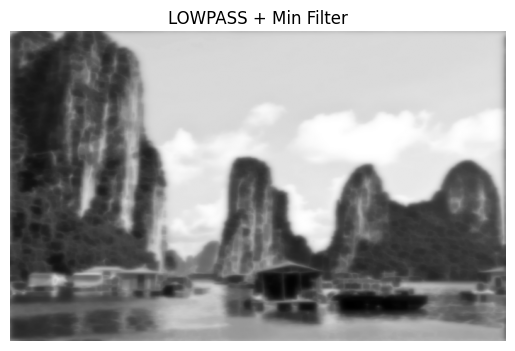

Đã lưu: lowpass_1.png
Sử dụng Butterworth lowpass + Min Filter


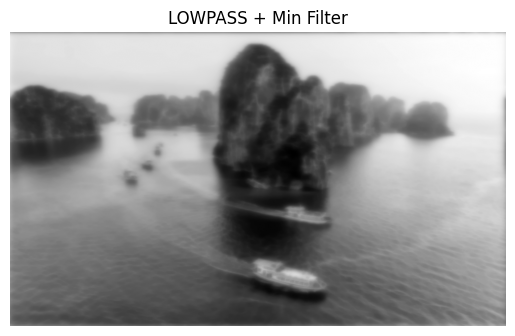

Đã lưu: lowpass_2.png
Sử dụng Butterworth highpass + Max Filter


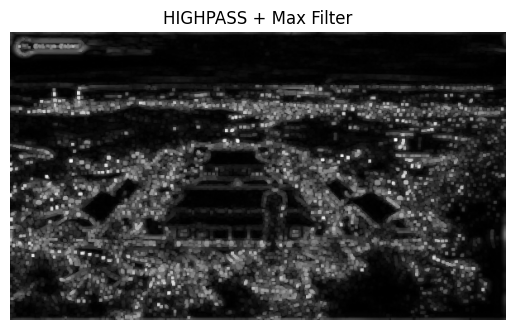

Đã lưu: highpass_3.png


In [7]:
import os
import random
import numpy as np
import scipy.fftpack
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import imageio.v3 as iio

def random_rgb_permute(img):
    arr = np.asarray(img)
    perm = np.random.permutation(3)
    return Image.fromarray(arr[:, :, perm])

def butterworth_lowpass(im, d0=30, n=1):
    im_array = np.asarray(im.convert("L")).astype(float)
    F = scipy.fftpack.fft2(im_array)
    F_shifted = scipy.fftpack.fftshift(F)

    M, N = im_array.shape
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M/2)**2 + (v - N/2)**2)
            H[u, v] = 1 / (1 + (D / d0)**(2 * n))

    G = F_shifted * H
    G = scipy.fftpack.ifftshift(G)
    img_back = np.abs(scipy.fftpack.ifft2(G))
    img_back = np.clip(img_back, 0, 255).astype(np.uint8)
    return Image.fromarray(img_back)

def butterworth_highpass(im, d0=30, n=2):
    im_array = np.asarray(im.convert("L")).astype(float)
    F = scipy.fftpack.fft2(im_array)
    F_shifted = scipy.fftpack.fftshift(F)

    M, N = im_array.shape
    H = np.ones((M, N))
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M/2)**2 + (v - N/2)**2)
            if D == 0:
                H[u, v] = 0
            else:
                H[u, v] = 1 / (1 + (d0 / D)**(2 * n))

    G = F_shifted * H
    G = scipy.fftpack.ifftshift(G)
    img_back = np.abs(scipy.fftpack.ifft2(G))
    img_back = np.clip(img_back, 0, 255).astype(np.uint8)
    return Image.fromarray(img_back)

def process_images(folder="exercise"):
    files = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
    count = 0
    for file in files:
        count += 1
        img = Image.open(file).convert("RGB")
        img_rgb_random = random_rgb_permute(img)

        filter_type = random.choice(["lowpass", "highpass"])

        if filter_type == "lowpass":
            print("Sử dụng Butterworth lowpass + Min Filter")
            filtered = butterworth_lowpass(img_rgb_random)
            final_img = filtered.filter(ImageFilter.MinFilter(3))
        else:
            print("Sử dụng Butterworth highpass + Max Filter")
            filtered = butterworth_highpass(img_rgb_random)
            final_img = filtered.filter(ImageFilter.MaxFilter(3))

        plt.imshow(final_img, cmap='gray')
        plt.title(f"{filter_type.upper()} + {'Min' if filter_type == 'lowpass' else 'Max'} Filter")
        plt.axis('off')
        plt.show()

        save_name = f"{filter_type}_{count}.png"
        iio.imwrite(save_name, final_img)
        print(f"Đã lưu: {save_name}")

process_images()
